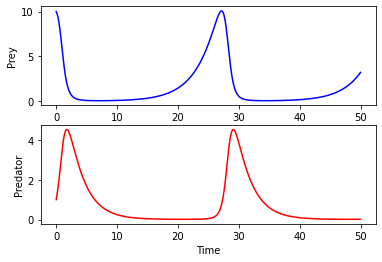

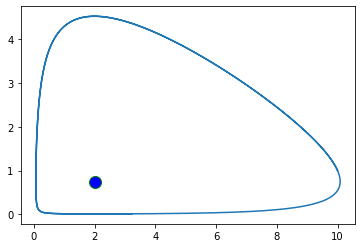

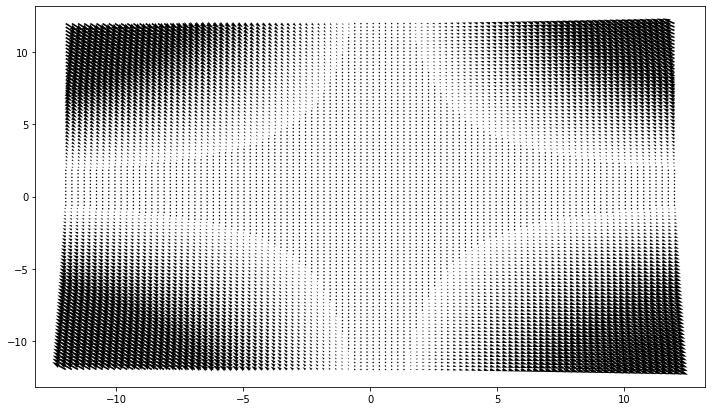

In [3]:
import numpy as np
import matplotlib
# matplotlib.use('tkagg')
import matplotlib.pyplot as plt
from scipy.integrate import odeint


initial_populations = [10,1] # [prey, predators] units in hundreds

# Create a timeline from 0 to 50 divided into a thousand steps
t = np.linspace(0,50,num=1000)

# Pick rates that lead to periodicity
####################################
prey_growth_rate = 0.3#1.1 # natural prey growth rate
prey_death_rate = 0.4 # of all pred/prey pairs (their multiple), how much prey death?
predator_growth_rate = 0.2 # of all pred/prey pairs (their multiple), how much predator growth?
predator_death_rate = 0.4 # natural predator death rate

# There actually is a steady state (other than [0,0])
# initial_populations = [predator_death_rate/predator_growth_rate , prey_growth_rate/prey_death_rate] # [prey, predators] units in hundreds


params = [prey_growth_rate, prey_death_rate, predator_growth_rate, predator_death_rate]

# Calculates current population change rates for current timestep
#################################################################
def calculate_current_population_change_rates(current_counts, t, params):

    # prey population level
    prey_count = current_counts[0]

    # predatory population level
    predator_count = current_counts[1]


    prey_growth_rate = params[0]
    prey_death_rate = params[1]
    predator_growth_rate = params[2]
    predator_death_rate = params[3]

    dxdt = (prey_growth_rate * prey_count) - (prey_death_rate * prey_count * predator_count)
    dydt = (predator_growth_rate * prey_count * predator_count) - (predator_death_rate * predator_count)
    return([dxdt, dydt])

# Repeatedly calls 'calculate_current_population_change_rates' for every time step and solves numerically to get the population numbers
solutions = odeint(calculate_current_population_change_rates, initial_populations, t, args=(params,))

#Plot the two population counts over time
#########################################
f,(prey,predator) = plt.subplots(2)

line1, = prey.plot(t,solutions[:,0], color="b")
line2, = predator.plot(t,solutions[:,1], color="r")

prey.set_ylabel("Prey")
predator.set_ylabel("Predator")
predator.set_xlabel("Time")

plt.show()

# Added phase diagram
plt.plot(solutions[:,0], solutions[:,1])
# Show the fixed point
plt.plot(predator_death_rate/predator_growth_rate , prey_growth_rate/prey_death_rate, color='green', linestyle='dashed', linewidth = 3,
         marker='o', markerfacecolor='blue', markersize=12) #the fixed point
plt.show()

# ANOTHER Phase Diagram
# Creating data set
w = 12
Y, X = np.mgrid[-w:w:100j, -w:w:100j]
#U = -1 - X**2 + Y
U = (prey_growth_rate * X) - (prey_death_rate * X * Y)
#V = 1 + X - Y**2
V = (predator_growth_rate * X * Y) - (predator_death_rate * Y)
speed = np.sqrt(U**2 + V**2)
  
# Creating plot
fig = plt.figure(figsize = (12, 7))
#plt.streamplot(X, Y, U, V, density = 1)
plt.quiver(X,Y,U,V)
  
# show plot
plt.show()

# Test paramater sweep

In [28]:
def test_detect_oscillation(solutions, error, parameters):
    peaks = {}
    count = 0
    peak_index = 0

    for i in solutions:
        count+=1

        
        
        prey_count = i[0]
        predator_count = i[1]
        

        prey_growth_rate = parameters[0]
        prey_death_rate = parameters[1]



        dxdt = (prey_growth_rate * prey_count) - (prey_death_rate * prey_count * predator_count)
        #print(dxn_dt)
        if isclose(abs(dxdt), 0, abs_tol=error):
            peaks[count] = i
            peak_index = count
    return peaks

In [31]:
test_detect_oscillation(solutions, 0.0001, params)

{905: array([0.02430307, 2.75741235])}

In [51]:
find_peaks(solutions[:,1])[0]

array([ 35, 581])

In [82]:
x = np.array([[0,0,0,0]])
y = np.append(x, [[4,5,6,7]], axis = 0)

In [84]:
z = np.append(y, [[0,0,0,0]], axis = 0)
z

array([[0, 0, 0, 0],
       [4, 5, 6, 7],
       [0, 0, 0, 0]])

In [86]:


for i in range(100):
    X = np.append(x, i )

X


array([ 0,  0,  0,  0, 99])

In [3]:
def test_sweeper():
    #lists of parameter ranges
    prey_growth_rate_list = np.arange(0.1,2,0.1).tolist() # natural prey growth rate
    prey_death_rate_list = np.arange(0.1,1,0.1).tolist() # of all pred/prey pairs (their multiple), how much prey death?
    predator_growth_rate_list = np.arange(0.1,1,0.1).tolist() # of all pred/prey pairs (their multiple), how much predator growth?
    predator_death_rate_list = np.arange(0.1,1,0.1).tolist() # natural predator death rate

    param_range = np.array([[0,0,0,0,0,0]])
    
    for a in prey_growth_rate_list:
        for b in prey_death_rate_list:
            for c in predator_growth_rate_list:
                for d in predator_death_rate_list:
                    initial_populations = [10,1]

                    t = np.linspace(0,50,num=1000)

                    prey_growth_rate = a
                    prey_death_rate = b
                    predator_growth_rate = c
                    predator_death_rate = d

                    params = [prey_growth_rate, prey_death_rate, predator_growth_rate, predator_death_rate]

                    solutions = odeint(calculate_current_population_change_rates, initial_populations, t, args=(params,))


                    peaks_prey = len(find_peaks(solutions[:,0])[0])
                    peaks_pred = len(find_peaks(solutions[:,1])[0])
                    
                    
                    #if len(peaks) > 3:
                        #return params
                    param_range = np.append(param_range, [[peaks_prey,peaks_pred, a,b,c,d,]], axis = 0)

    return param_range 
                    
                

                                        
                                        

In [4]:
param_range = test_sweeper()


In [10]:
param_range = np.delete(param_range,0,0)

In [11]:
param_range[:,2]/param_range[:,3]

array([1.        , 1.        , 1.        , ..., 2.11111111, 2.11111111,
       2.11111111])

In [9]:
x = np.array([6,6,6])
y = np.array([2,2,2])

x/y

array([3., 3., 3.])

Text(0.5, 0, 'Oscillations')

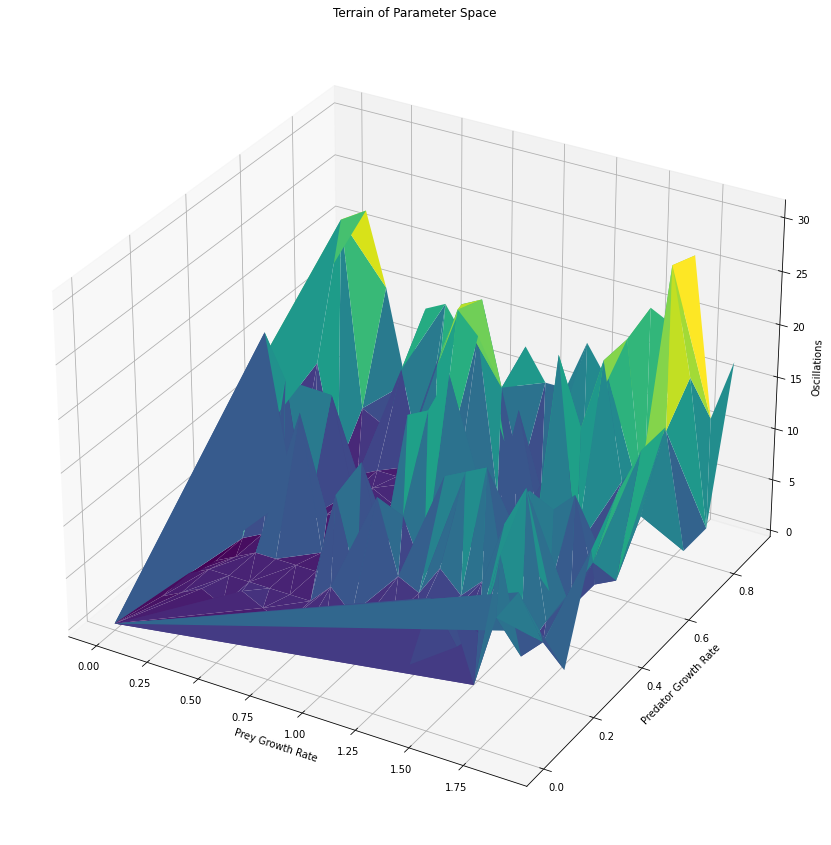

In [6]:

fig = plt.figure(figsize = (15,15))


#ax = fig.add_subplot(121, projection = '3d')

#ax.scatter(param_range[:,2], param_range[:,4], param_range[:,0], c = param_range[:,0],cmap='viridis', linewidth=0.5)

ax = fig.add_subplot(111, projection = '3d')

ax.plot_trisurf(param_range[:,2], param_range[:,4], param_range[:,0],
                cmap='viridis', edgecolor='none');

ax.set_title('Terrain of Parameter Space')
ax.set_xlabel('Prey Growth Rate')
ax.set_ylabel('Predator Growth Rate')
ax.set_zlabel('Oscillations')



Text(0.5, 0, 'Oscillations')

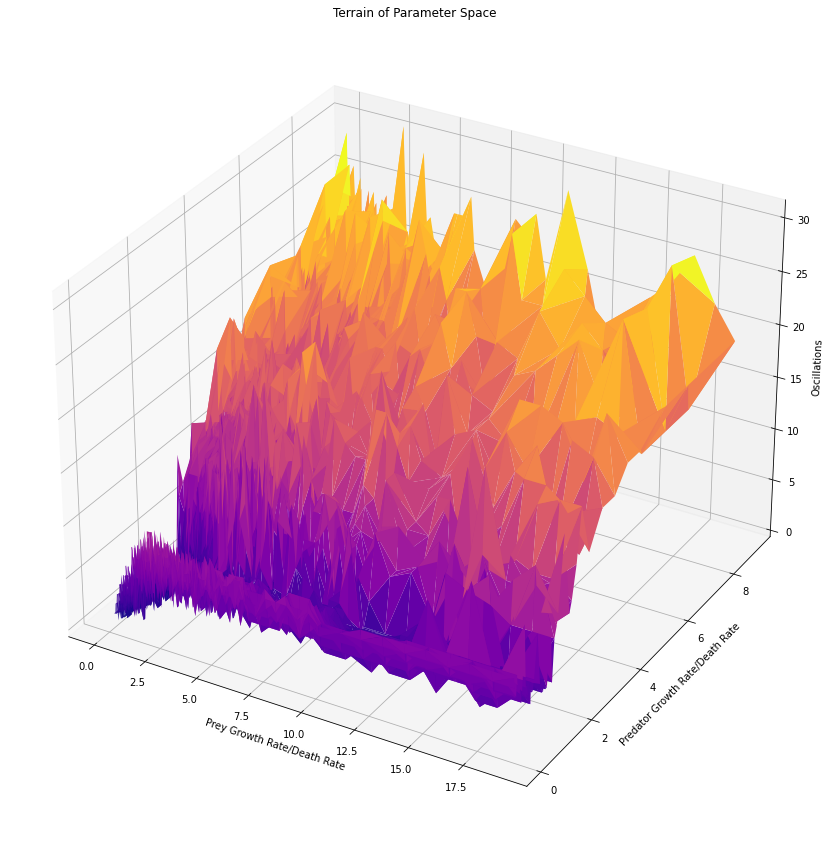

In [12]:
x = param_range[:,2]/param_range[:,3]
y = param_range[:,4]/param_range[:,5]


fig = plt.figure(figsize = (15,15))


#ax = fig.add_subplot(121, projection = '3d')

#ax.scatter(param_range[:,2], param_range[:,4], param_range[:,0], c = param_range[:,0],cmap='viridis', linewidth=0.5)

ax = fig.add_subplot(111, projection = '3d')

ax.plot_trisurf(x, y, param_range[:,0],
                cmap='plasma', edgecolor='none');

ax.set_title('Terrain of Parameter Space')
ax.set_xlabel('Prey Growth Rate/Death Rate')
ax.set_ylabel('Predator Growth Rate/Death Rate')
ax.set_zlabel('Oscillations')

Text(0.5, 0, 'Oscillations')

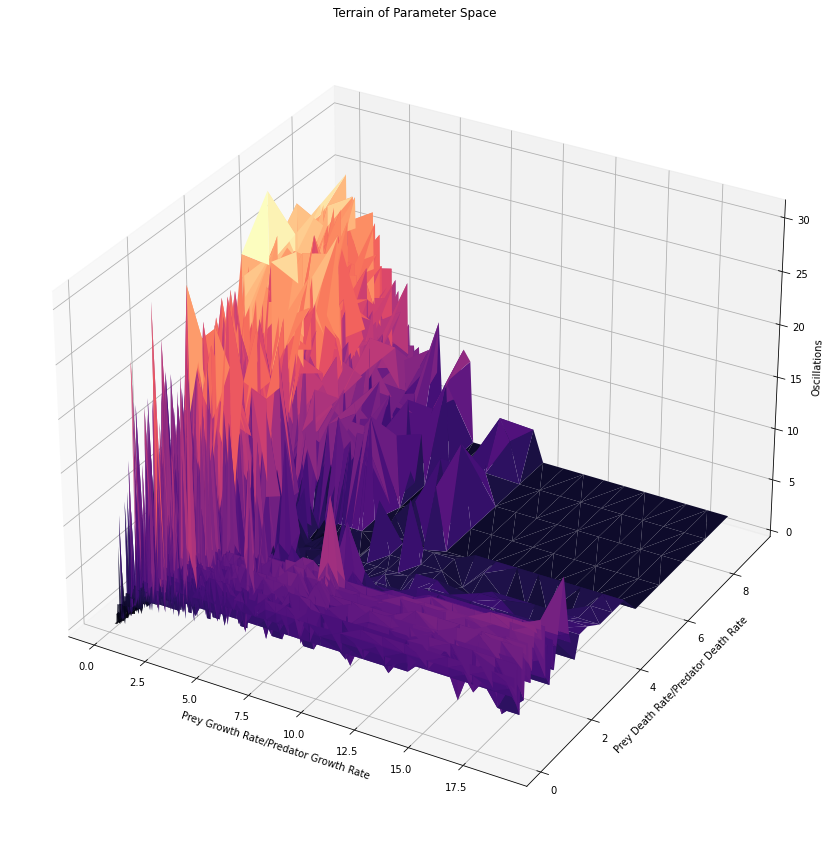

In [16]:
x = param_range[:,2]/param_range[:,4]
y = param_range[:,3]/param_range[:,5]


fig = plt.figure(figsize = (15,15))


#ax = fig.add_subplot(121, projection = '3d')

#ax.scatter(param_range[:,2], param_range[:,4], param_range[:,0], c = param_range[:,0],cmap='viridis', linewidth=0.5)

ax = fig.add_subplot(111, projection = '3d')

ax.plot_trisurf(x, y, param_range[:,0],
                cmap='magma', edgecolor='none');

ax.set_title('Terrain of Parameter Space')
ax.set_xlabel('Prey Growth Rate/Predator Growth Rate')
ax.set_ylabel('Prey Death Rate/Predator Death Rate')
ax.set_zlabel('Oscillations')

# Jacobian 

In [2]:
# DETERMINE STABILITY OF A FIXED POINT
######################################

import numpy as np
import matplotlib
import matplotlib.pyplot as plt

# Remember our constant params
##############################
prey_growth_rate = 1.1
prey_death_rate = 0.4
predator_growth_rate = 0.2
predator_death_rate = 0.4

# temp dummy values, so I can type & run this
x = 1
y = 1
# Remember our differentials
# for clarity, 'x' will now be 'prey_count', y will be 'predator_count'
#######################################################################
# dxdt = (prey_growth_rate * prey_count) - (prey_death_rate * prey_count * predator_count)
dxdt = (prey_growth_rate * x) - (prey_death_rate * x * y)
# dydt = (predator_growth_rate * prey_count * predator_count) - (predator_death_rate * predator_count)
dydt = (predator_growth_rate * x * y) - (predator_death_rate * y)

# What is the Jacobian of this system of equations?
# It's a 2 x 2 matrix of the right-sides, partially differentiated against x and partially differentiated against y
# The first row of the Jacobian will be '(prey_growth_rate * x) - (prey_death_rate * x * y)'
#     differentiated against x, and then against y
# Against x, it becomes
#     prey_growth_rate - prey_death_rate*y
# Against y, it becomes
#     prey_death_rate*x
#
# So, the first row of the Jacobian is
#     prey_growth_rate - prey_death_rate*y , prey_death_rate*x
#
#
# The SECOND row of the Jacobian will be '(predator_growth_rate * x * y) - (predator_death_rate * y)'
#     differentiated against x, and then against y
# Against x, it becomes
#     predator_growth_rate*y
# Against y, it becomes
#     predator_growth_rate*x - predator_death_rate
#
# So, the second row of the Jacobian is
#     predator_growth_rate*y , predator_growth_rate*x - predator_death_rate
#
#
# The completed Jacobian looks like this:
J = [[prey_growth_rate - prey_death_rate*y, prey_death_rate*x],
     [predator_growth_rate*y,               predator_growth_rate*x - predator_death_rate]]

# This Jacobian applies to ANY point, but we're interested in a particular fixed point
# From the original differentials,
#    dxdt = (prey_growth_rate * x) - (prey_death_rate * x * y)
#    dydt = (predator_growth_rate * x * y) - (predator_death_rate * y)
# we see that there are 2 points where it's ZERO
#
# FIXED POINTS
# x = y = 0, or
# x = predator_death_rate/predator_growth_rate (=2) , y = prey_growth_rate/prey_death_rate (=2.75)
#
# Substitute in the fixed point coordinates into the Jacobian
J = [[prey_growth_rate - prey_death_rate*2.75, prey_death_rate*2],
     [predator_growth_rate*2.75,               predator_growth_rate*2 - predator_death_rate]]
# Hell, substitute ALL the param values into the Jacobian
J = [[1.1 - 0.4*2.75, 0.4*2],
     [0.2*2.75,       0.2*2 - 0.4]]
# that is,
J = [[0,    0.8],
     [0.55, 0]]


w,v = np.linalg.eig(J)
#Eigenvalues
print(w)
#Eigenvectors
#print(v)

# We see the eigenvalues are real and opposite signs
# Half is pulling in, half is pulling away
# [ 0.66332496 -0.66332496]
# Therefore, UNSTABLE

      



[ 0.66332496 -0.66332496]


# Two domain inhibitory network from paper

In [2]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from scipy.integrate import odeint
from scipy.signal import find_peaks
from sympy import *
from math import isclose

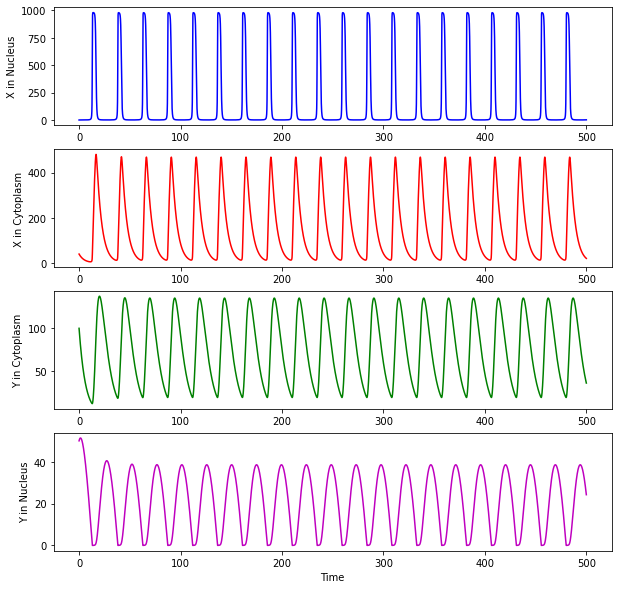

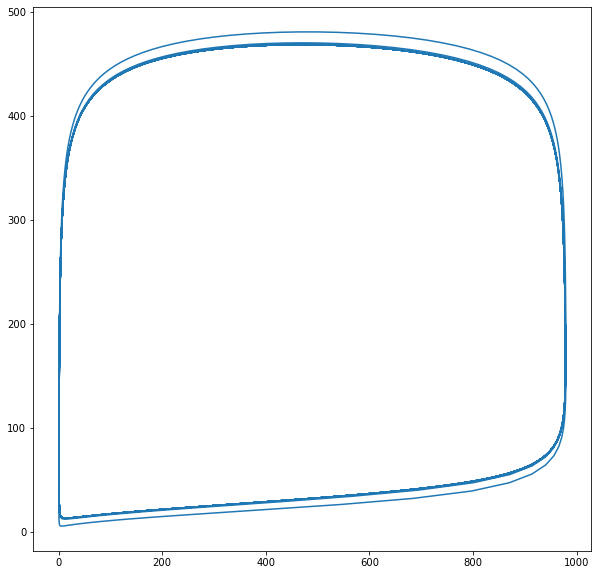

NameError: name 'prey_growth_rate' is not defined

In [2]:
initial_populations = [0,40,100,50] # [prey, predators] units in hundreds

# Create a timeline from 0 to 50 divided into a thousand steps
t = np.linspace(0,500,num=10000)

# Pick rates that lead to periodicity
####################################

# There actually is a steady state (other than [0,0])
# initial_populations = [predator_death_rate/predator_growth_rate , prey_growth_rate/prey_death_rate] # [prey, predators] units in hundreds

sig=1000
p=2
kdxn=10
kexport=0.2
kdxc=0.2
eps=1
kdyn=8
kdyc=0.1
Km=0.1
kimport=0.1

params = [sig, p, kdxn, kexport, kdxc, eps, kdyn, kdyc, Km, kimport]

# Calculates current population change rates for current timestep
#################################################################
def calculate_current_population_change_rates(current_counts, t, params):

    #xn = 100
    xn = current_counts[0]
    xc = current_counts[1]
    
    yc = current_counts[2]
    yn = current_counts[3]


    sig = params[0]
    p = params[1]
    kdxn = params[2]
    kexport = params[3]
    kdxc = params[4]
    eps = params[5]
    kdyn = params[6]
    kdyc = params[7]
    Km = params[8]
    kimport = params[9]

    dxn_dt = kdxn*(sig/(1 + yn**p) - xn) - kexport*xn 
    dxc_dt = eps*kexport*xn - kdxc*xc
    dyc_dt = kdyc*(xc - yc) - eps*kimport*yc 
    dyn_dt = (kimport*yc) - (kdyn*yn/(Km + yn))




    return([dxn_dt, dxc_dt, dyc_dt, dyn_dt])

# Repeatedly calls 'calculate_current_population_change_rates' for every time step and solves numerically to get the population numbers
solutions = odeint(calculate_current_population_change_rates, initial_populations, t, args=(params,))

#Plot the two population counts over time
#########################################
f,(xn,xc,yc,yn) = plt.subplots(4, figsize = (10,10))

line1, = xn.plot(t,solutions[:,0], color="b")
line2, = xc.plot(t,solutions[:,1], color="r")
line3, = yc.plot(t,solutions[:,2], color="g")
line4, = yn.plot(t,solutions[:,3], color="m")

xn.set_ylabel("X in Nucleus")
xc.set_ylabel("X in Cytoplasm")
yc.set_ylabel("Y in Cytoplasm")
yn.set_ylabel("Y in Nucleus")
yn.set_xlabel("Time")

plt.show()

# Added phase diagram
plt.figure(figsize=(10,10))
plt.plot(solutions[:,0], solutions[:,1])
# Show the fixed point
#plt.plot(predator_death_rate/predator_growth_rate , prey_growth_rate/prey_death_rate, color='green', linestyle='dashed', linewidth = 3,
         #marker='o', markerfacecolor='blue', markersize=12) #the fixed point
plt.show()

# ANOTHER Phase Diagram
# Creating data set
w = 12
Y, X = np.mgrid[-w:w:100j, -w:w:100j]
#U = -1 - X**2 + Y
U = (prey_growth_rate * X) - (prey_death_rate * X * Y)
#V = 1 + X - Y**2
V = (predator_growth_rate * X * Y) - (predator_death_rate * Y)
speed = np.sqrt(U**2 + V**2)
  
# Creating plot
fig = plt.figure(figsize = (12, 7))
plt.streamplot(X, Y, U, V, density = 1)
  
# show plot
plt.show()

# Time Series Plot

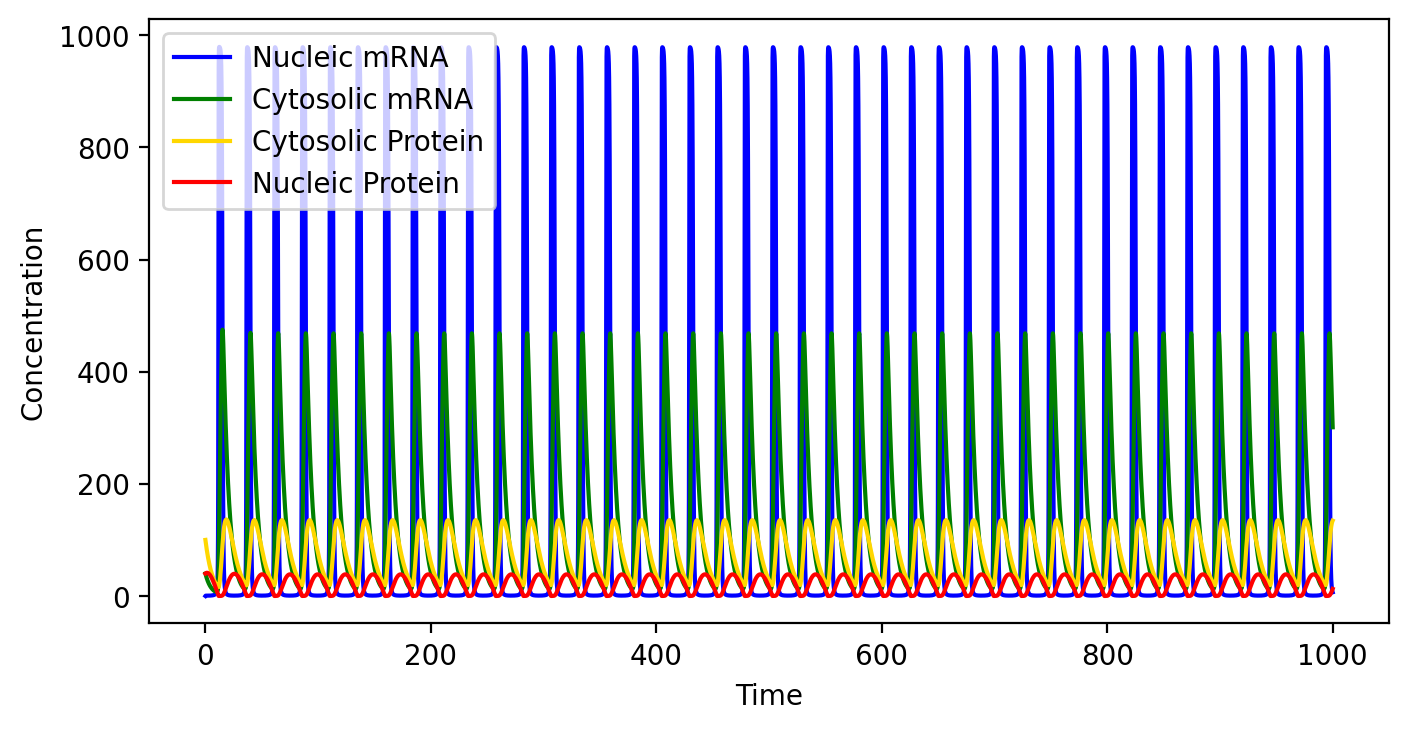

In [19]:
initial_populations = [0,40,100,40] # [prey, predators] units in hundreds

# Create a timeline from 0 to 50 divided into a thousand steps
t = np.linspace(0,1000,num=100000)

# Pick rates that lead to periodicity
####################################

# There actually is a steady state (other than [0,0])
# initial_populations = [predator_death_rate/predator_growth_rate , prey_growth_rate/prey_death_rate] # [prey, predators] units in hundreds

sig=1000
p=2
kdxn=10
kexport=0.2
kdxc=0.2
eps=1
kdyn=8
kdyc=0.1
Km=0.1
kimport=0.1

params = [sig, p, kdxn, kexport, kdxc, eps, kdyn, kdyc, Km, kimport]

# Calculates current population change rates for current timestep
#################################################################
def calculate_current_population_change_rates(current_counts, t, params):

    #xn = 100
    xn = current_counts[0]
    xc = current_counts[1]
    
    yc = current_counts[2]
    yn = current_counts[3]


    sig = params[0]
    p = params[1]
    kdxn = params[2]
    kexport = params[3]
    kdxc = params[4]
    eps = params[5]
    kdyn = params[6]
    kdyc = params[7]
    Km = params[8]
    kimport = params[9]

    dxn_dt = kdxn*(sig/(1 + yn**p) - xn) - kexport*xn 
    dxc_dt = eps*kexport*xn - kdxc*xc
    dyc_dt = kdyc*(xc - yc) - eps*kimport*yc 
    dyn_dt = (kimport*yc) - (kdyn*yn/(Km + yn))




    return([dxn_dt, dxc_dt, dyc_dt, dyn_dt])

# Repeatedly calls 'calculate_current_population_change_rates' for every time step and solves numerically to get the population numbers
solutions = odeint(calculate_current_population_change_rates, initial_populations, t, args=(params,))

#Plot the two population counts over time
#########################################
fig = plt.figure(figsize=(8,4),dpi=200)

plt.plot(t,solutions[:,0], color="b", label = 'Nucleic mRNA')
plt.plot(t,solutions[:,1], color="g", label = 'Cytosolic mRNA')
plt.plot(t,solutions[:,2], color="gold", label = 'Cytosolic Protein')
plt.plot(t,solutions[:,3], color="r", label = 'Nucleic Protein')

plt.xlabel('Time')
plt.ylabel('Concentration')
plt.legend()

plt.show()



# Phase Diagrams

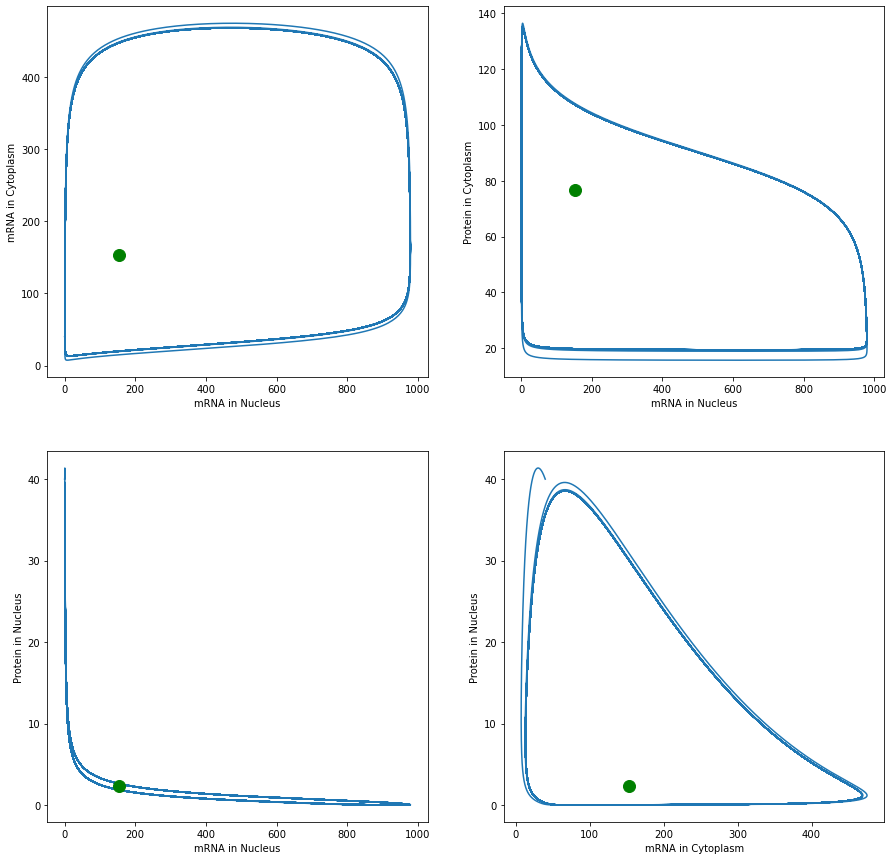

In [4]:


#find fixed points
sig = params[0]
p = params[1]
kdxn = params[2]
kexport = params[3]
kdxc = params[4]
eps = params[5]
kdyn = params[6]
Km = params[7]
kimport = params[8]

xn,xc,yc,yn = symbols('xn,xc,yc,yn')

eq1 = kdxn*(sig/(1 + yn**p) - xn) - kexport*xn 
eq2 = eps*kexport*xn - kdxc*xc
eq3 = kdyc*(xc - yc) - eps*kimport*yc 
eq4 = (kimport*yc) - (kdyn*yn/(Km + yn))

system = [eq1,eq2,eq3,eq4]
init_conc = [initial_populations[0],initial_populations[1],initial_populations[2],initial_populations[3]]
init_sol = np.random.rand(len(init_conc))*max(init_conc)

result = False
while result is False:
    try:
        init_sol = np.random.rand(len(init_conc))*max(init_conc)
        solution = nsolve(system, [xn,xc,yc,yn], init_sol, verify=True)
        if solution[3] > 0:
            result = True
            break
    except ValueError:
        pass

x_nuc = solution[0]
x_cyt = solution[1]
y_cyt = solution[2]
y_nuc = solution[3]
#solution = nsolve(system, [xn,xc,yc,yn], init_sol, verify=True)

# Added phase diagram
fig, axs = plt.subplots(2,2, figsize = (15,15))

axs[0,0].plot(solutions[:,0], solutions[:,1])
axs[0,0].plot(x_nuc, x_cyt, color='green', linestyle='dashed', linewidth = 3,
         marker='o', markerfacecolor='green', markersize=12) #the fixed point
axs[0,0].set_xlabel('mRNA in Nucleus')
axs[0,0].set_ylabel('mRNA in Cytoplasm')

axs[0,1].plot(solutions[:,0], solutions[:,2])
axs[0,1].plot(x_nuc, y_cyt, color='green', linestyle='dashed', linewidth = 3,
         marker='o', markerfacecolor='green', markersize=12) #the fixed point
axs[0,1].set_xlabel('mRNA in Nucleus')
axs[0,1].set_ylabel('Protein in Cytoplasm')

axs[1,0].plot(solutions[:,0], solutions[:,3])
axs[1,0].plot(x_nuc, y_nuc, color='green', linestyle='dashed', linewidth = 3,
         marker='o', markerfacecolor='green', markersize=12) #the fixed point
axs[1,0].set_xlabel('mRNA in Nucleus')
axs[1,0].set_ylabel('Protein in Nucleus')

axs[1,1].plot(solutions[:,1], solutions[:,3])
axs[1,1].plot(x_cyt, y_nuc, color='green', linestyle='dashed', linewidth = 3,
         marker='o', markerfacecolor='green', markersize=12) #the fixed point
axs[1,1].set_xlabel('mRNA in Cytoplasm')
axs[1,1].set_ylabel('Protein in Nucleus')

# Show the fixed point



#plot nullclines

plt.show()



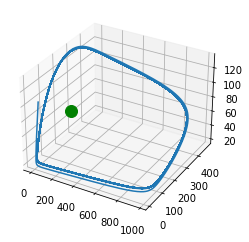

In [5]:
fig = plt.figure()
ax = plt.axes(projection = '3d')

ax.plot3D(solutions[:,0], solutions[:,1], solutions[:,2])
ax.plot3D(x_nuc,x_cyt,y_cyt, color='green', linestyle='dashed', linewidth = 3,
         marker='o', markerfacecolor='green', markersize=12)


In [23]:
for i in solutions:
    print(i[0])

0.0
0.03634524437015228
0.07051076949531249
0.10262609380251869
0.13281306434914142
0.16118630878521226
0.18785358049791506
0.21291631726807156
0.23646992982903145
0.2586041039340501
0.27940324770451697
0.2989467409664906
0.3173092527607065
0.3345610189867029
0.35076810540010106
0.36599264895481437
0.3802931020177311
0.39372446901406166
0.40633846344618363
0.418183712517994
0.42930597222374345
0.4397482948999824
0.44955116838950326
0.4587526688872102
0.46738861672672743
0.4754927055638571
0.4830966281836435
0.4902301950245205
0.49692144674755195
0.503196757278602
0.5090809360573135
0.514597318447057
0.5197678547020453
0.5246131909499967
0.5291527493567203
0.533404794852698
0.5373865065642022
0.5411140503291334
0.5446026256482687
0.5478665308054032
0.550919218218046
0.5537733360219842
0.5564407844969241
0.5589327576010054
0.5612597804788392
0.5634317573190474
0.5654580027051378
0.5673472756235415
0.5691078185374643
0.5707473818989659
0.5722732547992495
0.573692296423659
0.57501095571899

# Oscillation detector

In [6]:
isclose(100, abs(-102), abs_tol=4)

True

In [6]:
def detect_oscillation(solutions, error, parameters):
    peaks = {}
    count = 0
    peak_index = -100

    for i in solutions:
        count+=1

        if count > peak_index + 99:
        
            xn = i[0]
            xc = i[1]
            yc = i[2]
            yn = i[3]

            sig = parameters[0]
            p = parameters[1]
            kdxn = parameters[2]
            kexport = parameters[3]

            dxn_dt = kdxn*(sig/(1 + yn**p) - xn) - kexport*xn 
            #print(dxn_dt)
            if isclose(abs(dxn_dt), 0, abs_tol=error):
                peaks[count] = i
                peak_index = count
    return peaks

        
        

In [92]:
len(detect_oscillation(solutions, .001, params))

42

# Paramater sweep

In [101]:
np.arange(0.1, 100).tolist()

[0.1,
 1.1,
 2.1,
 3.1,
 4.1,
 5.1,
 6.1,
 7.1,
 8.1,
 9.1,
 10.1,
 11.1,
 12.1,
 13.1,
 14.1,
 15.1,
 16.1,
 17.1,
 18.1,
 19.1,
 20.1,
 21.1,
 22.1,
 23.1,
 24.1,
 25.1,
 26.1,
 27.1,
 28.1,
 29.1,
 30.1,
 31.1,
 32.1,
 33.1,
 34.1,
 35.1,
 36.1,
 37.1,
 38.1,
 39.1,
 40.1,
 41.1,
 42.1,
 43.1,
 44.1,
 45.1,
 46.1,
 47.1,
 48.1,
 49.1,
 50.1,
 51.1,
 52.1,
 53.1,
 54.1,
 55.1,
 56.1,
 57.1,
 58.1,
 59.1,
 60.1,
 61.1,
 62.1,
 63.1,
 64.1,
 65.1,
 66.1,
 67.1,
 68.1,
 69.1,
 70.1,
 71.1,
 72.1,
 73.1,
 74.1,
 75.1,
 76.1,
 77.1,
 78.1,
 79.1,
 80.1,
 81.1,
 82.1,
 83.1,
 84.1,
 85.1,
 86.1,
 87.1,
 88.1,
 89.1,
 90.1,
 91.1,
 92.1,
 93.1,
 94.1,
 95.1,
 96.1,
 97.1,
 98.1,
 99.1]

In [24]:
def sweeper():
    #lists of parameter ranges
    sig_sweep = np.arange(100, 1100, 10).tolist()
    p_sweep = np.arange(1, 4).tolist()
    kdxn_sweep = np.arange(1, 50).tolist()
    kexport_sweep = np.arange(0.1, 1).tolist()
    kdxc_sweep = np.arange(0.1,1).tolist()
    eps_sweep = np.arange(0.1, 2).tolist()
    kdyn_sweep = np.arange(1,10).tolist()
    kdyc_sweep = np.arange(0.1, 2, 0.1).tolist()
    Km_sweep = np.arange(0.1, 2, 0.1).tolist()
    kimport_sweep = np.arange(0.1, 2, 0.1).tolist()

    param_range = np.array([[0,0,0,0,0,0,0,0,0,0,0,0,0,0]])

    for a in sig_sweep:
        for b in p_sweep:
            for c in kdxn_sweep:
                for d in kexport_sweep:
                    for e in kdxc_sweep:
                        for f in eps_sweep:
                            for g in kdyn_sweep:
                                for h in kdyc_sweep:
                                    for i in Km_sweep:
                                        for j in kimport_sweep:
                                            initial_populations = [0,40,100,40] # [prey, predators] units in hundreds

                                            # Create a timeline from 0 to 50 divided into a thousand steps
                                            t = np.linspace(0,50,num=1000)

                                
                                            sig=a
                                            p=b
                                            kdxn=c
                                            kexport=d
                                            kdxc=e
                                            eps=f
                                            kdyn=g
                                            kdyc=h
                                            Km=i
                                            kimport=j

                                            params = [sig, p, kdxn, kexport, kdxc, eps, kdyn, kdyc, Km, kimport]

                                        
                                            solutions = odeint(calculate_current_population_change_rates, initial_populations, t, args=(params,))

                                            xn_peaks = len(find_peaks(solutions[:,0])[0])
                                            xc_peaks = len(find_peaks(solutions[:,1])[0])
                                            yc_peaks = len(find_peaks(solutions[:,2])[0])
                                            yn_peaks = len(find_peaks(solutions[:,3])[0])
                    
                                        
                                            param_range = np.append(param_range, [[xn_peaks,xc_peaks,yc_peaks,yn_peaks,sig,p,kdxn,kexport,kdxc,eps,kdyn,kdyc,Km,kimport]], axis = 0)
                                            
    return np.delete(param_range,0,0)

                                        

In [25]:
sweep = sweeper()

KeyboardInterrupt: 

In [100]:
params

[1000, 2, 10, 0.2, 0.2, 1, 8, 0.1, 0.1, 0]

# Cost function and Paramater regions 

In [2]:
import numpy as np 
import math
import peakutils
import numpy.fft as fft
import matplotlib as mpl 
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker 
from matplotlib import cm  
from scipy.integrate import odeint 
import scipy.signal as signal 

In [3]:
import math
import pickle 
import numpy as np
import matplotlib.pyplot as plt 
import matplotlib.ticker as ticker
import random as rand  
from numpy import random
#from dFlipFlop import DFlipFlop
#from acdc import ACDC  
#from repressilator import Repressilator
from sklearn import decomposition 
from deap import creator, base, tools, algorithms 
from sklearn.decomposition import PCA
from mpl_toolkits.mplot3d import Axes3D
from sklearn.cluster import KMeans  
import matplotlib.ticker as ticker
import os.path 

## Model class object

In [5]:
'''
The deterministic model of biological repressilator 
''' 
class Repressilator: 
	
	def __init__(self, parameter_values, params, initial_conditions, dt = 0.001, mode = 0): 
		self.nParams = len(params)   
		self.params = params #model parameters
		self.parameter_values = parameter_values #allowed parameter ranges  
		self.y0 = initial_conditions 	
		self.dt = dt
		self.T = 48 #hours
		self.N = int(self.T/self.dt) 
		self.ts = np.linspace(0, self.T, self.N) 
		self.amp = 300 #[nM] 		
		self.per = self.T/8 	
		self.sample_rate 		= 0.0033333333 #Hz 
		self.samples_per_hour 	= (1/self.dt)		
		self.jump 				= int(self.samples_per_hour/(self.sample_rate*3600))  	 	
		self.ideal = self.amp*(np.sin(math.pi*(self.ts)/self.per - math.pi/2) + 1) 
		#number of samples for FFT		
		self.nS = self.N/self.jump 
		self.dF = self.sample_rate/self.nS  
		self.idealF = self.getFrequencies(self.ideal) 		 	
		thresholdOne = -(self.nS/2)*100 #10nM -+ from ideal signal harmonics       
		thresholdTwo = 200  
		self.minAmp = 200
		self.maxAmp = 400 
		self.mode = mode    			
		self.modes = [self.eval]       
		self.threshold = thresholdOne  
		self.omega = 1 #nm^-1 
		if self.mode == 1:
			self.threshold = thresholdTwo
	
	#gets sumed difderence of arrayData
	@staticmethod 	
	def getDif(indexes, arrayData):	
		arrLen = len(indexes)
		sum = 0
		for i, ind in enumerate(indexes):
			if i == arrLen - 1:
				break
			sum += arrayData[ind] - arrayData[indexes[i + 1]]
			
		#add last peak - same as substracting it from zero 
		sum += arrayData[indexes[-1:]]  
		return sum   
		
	#gets standard deviation 
	@staticmethod 
	def getSTD(indexes, arrayData, window):
		numPeaks = len(indexes)
		arrLen = len(arrayData)
		sum = 0
		for ind in indexes:
			minInd = max(0, ind - window)
			maxInd = min(arrLen, ind + window)
			sum += np.std(arrayData[minInd:maxInd])  
			
		sum = sum/numPeaks 	
		return sum	 
	
	def getFrequencies(self, y):
		#fft sample rate: 1 sample per 5 minutes
		y = y[0::self.jump]  
		res = abs(fft.rfft(y))
		#normalize the amplitudes 
		res = res/math.ceil(self.nS/2) 
		return res

	def costOne(self, Y): 
		p1 = Y[:,1]   
		fftData = self.getFrequencies(p1)     
		
		diff = fftData - self.idealF         
		cost = -np.dot(diff, diff) 		
		return cost,	
		
	def costTwo(self, Y, getAmplitude = False): 
		p1 = Y[:,1]  
		fftData = self.getFrequencies(p1)      
		fftData = np.array(fftData) 
		#find peaks using very low threshold and minimum distance
		indexes = peakutils.indexes(fftData, thres=0.02/max(fftData), min_dist=1)  
		#in case of no oscillations return 0 
		if len(indexes) == 0:     
			return 0,  
		#if amplitude is greater than 400nM
		amp = np.max(fftData[indexes])
		if amp > self.maxAmp: 
			return 0, 
		fitSamples = fftData[indexes]  			
		std = self.getSTD(indexes, fftData, 1)  
		diff = self.getDif(indexes, fftData)  
		cost = std + diff
		#print(cost)   
		if getAmplitude:
			return cost, amp
		return cost, 
		
	def isViableFitness(self, fit):
		return fit >= self.threshold
		
	def isViable(self, point): 
		fitness = self.eval(point, getAmplitude=True)  
		if self.mode == 0:
			return self.isViableFitness(fitness[0]) 
			
		fit = fitness[0] 
		amp = 0
		if fit > 0:
			amp = fitness[1] 
		return self.isViableFitness(fit) and amp >= self.minAmp and amp <= self.maxAmp   
		
	#evaluates a candidate  
	def eval(self, candidate, getAmplitude = False): 
		Y = np.array(self.simulate(candidate)) 
		if self.mode == 0:
			return self.costOne(Y)  
		else:
			return self.costTwo(Y, getAmplitude)      
	
	#simulates a candidate
	def simulate(self, candidate): 
		return odeint(self.repressilatorModelOde, self.y0, self.ts, args=(candidate,))   		
		
	def plotModel(self, subject, mode="ode", show=True):     		
		if mode == "ode":
			ts = np.linspace(0, self.T, self.N)
			Y = self.simulate(subject) 			
		else:
			#ssa simulation
			ts,Y = self.represilatorStochastic(subject)
			
		Y = np.array(Y) 
		
		p0 = Y[:,0] 
		p1 = Y[:,1]  
		p2 = Y[:,2]   
		p3 = Y[:,3]     
		p4 = Y[:,4] 
		p5 = Y[:,5] 
		
		lines = plt.plot(ts, p1, ts, p3, ts, p5)  
		plt.setp(lines[0], linewidth=1.5, c="#15A357")
		plt.setp(lines[1], linewidth=1.5, c="#0E74C8")
		plt.setp(lines[2], linewidth=1.5, c="#A62B21")     		 
		plt.ylabel('Concentration [$nM$]')   
		plt.xlabel(r"Time [$h$]")   
		plt.legend(('X', 'Y', 'Z'), loc='upper right')      		
		if show: 	
			plt.show() 
			 				

	def getTotalVolume(self):
		vol = 1.0
		for param in self.params:		
			vol = vol*(self.parameter_values[param]["max"] - self.parameter_values[param]["min"])
		return vol 

	def repressilatorModelOde(self, Y, t, can):  
		alpha = can[0]
		alpha0 = can[1]
		n = can[2]
		beta = can[3]
		deltaRNA = can[4] 
		deltaP = can[5]
		kd = can[6] 
		mx = Y.item(0)
		my = Y.item(2) 
		mz = Y.item(4)
		x = Y.item(1)
		y = Y.item(3) 
		z = Y.item(5) 
		
		#in case of math range error
		try:
			dmx = -deltaRNA*mx + alpha/(1 + math.pow(z/kd, n)) + alpha0 
			dmy = -deltaRNA*my + alpha/(1 + math.pow(x/kd, n)) + alpha0  
			dmz = -deltaRNA*mz + alpha/(1 + math.pow(y/kd, n)) + alpha0  
		except (OverflowError, ValueError):
			dmx = -deltaRNA*mx + alpha + alpha0
			dmy = -deltaRNA*my + alpha + alpha0
			dmz = -deltaRNA*mz + alpha + alpha0 
			
		dpx = beta*mx - deltaP*x
		dpy = beta*my - deltaP*y 
		dpz = beta*mz - deltaP*z
		
		return np.array([dmx, dpx, dmy, dpy, dmz, dpz])
	
	
	def getPerAmp(self, subject, mode="ode", indx=0): 
		if mode == "ode":
			ts = np.linspace(0, self.T, self.N) 
			Y = self.simulate(subject)    				
		else:
			ts,Y = self.represilatorStochastic(subject) 
		ts = np.array(ts) 
		Y = np.array(Y) 
		sig = Y[:, indx]
		indx_max, properties = signal.find_peaks(sig, prominence = (np.max(sig) - np.min(sig))/4, distance = len(ts)/100)      
		indx_min, properties = signal.find_peaks(sig*-1, prominence = (np.max(sig) - np.min(sig))/4, distance = len(ts)/100)     

		amps = [] 
		pers = []   
		for i in range(min(len(indx_max), len(indx_min))):
			amps.append((sig[indx_max[i]] - sig[indx_min[i]])/2) 			
			if i + 1 < len(indx_max):
				pers.append(ts[indx_max[i + 1]] - ts[indx_max[i]])
			if i + 1 < len(indx_min):
				pers.append(ts[indx_min[i + 1]] - ts[indx_min[i]])
		
		if len(amps) > 0 and len(pers) > 0:
			amps = np.array(amps)   	
			pers = np.array(pers)  
			
			#print(amps)
			amp = np.mean(amps)	
			#print(pers) 
			per = np.mean(pers) 
		else:
			amp = 0
			per = 0  
		
		print("amp" + str(amp)) 
		print("per" + str(per))   	
		
		return per, amp 
			
	def represilatorStochastic(self, can):
		omega = self.omega 
		y_conc = np.array(self.y0*omega).astype(int) 
		Y_total = []
		Y_total.append(y_conc)
		t = 0 
		T = []   
		T.append(t)
		
		#get kinetic rates 
		alpha = can[0]
		alpha0 = can[1]
		n = can[2]
		beta = can[3]
		deltaRNA = can[4] 
		deltaP = can[5]
		kd = can[6] 
		
		N = np.zeros((6,15)) #6 species, 15 reactions
		N[0,0] = -1
		N[0,1] = 1 
		N[0,2] = 1 

		N[1,9] = 1
		N[1,10] = -1
		
		N[2,3] = -1 
		N[2,4] = 1
		N[2,5] = 1

		N[3,11] = 1
		N[3,12] = -1 
		
		N[4,6] = -1
		N[4,7] = 1
		N[4,8] = 1

		N[5,13] = 1
		N[5,14] = -1 
		
		
		while t < self.T:
			#choose two random numbers 
			r = np.random.uniform(size=2)
			r1 = r[0] 
			r2 = r[1] 					
			
			#get propensities
			a = np.zeros(15)
			a[0] = deltaRNA*y_conc[0] 
			a[1] = alpha/(1.0 + math.pow(y_conc[5]/(kd*omega), n))*omega 
			a[2] = alpha0*omega  
			
			a[3] = deltaRNA*y_conc[2] 
			a[4] = alpha/(1.0 + math.pow(y_conc[1]/(kd*omega), n))*omega
			a[5] = alpha0*omega   
			
			a[6] = deltaRNA*y_conc[4] 
			a[7] = alpha/(1.0 + math.pow(y_conc[3]/(kd*omega), n))*omega
			a[8] = alpha0*omega          
			
			a[9] = beta*y_conc[0]
			a[10] = deltaP*y_conc[1]

			a[11] = beta*y_conc[2]
			a[12] = deltaP*y_conc[3]

			a[13] = beta*y_conc[4] 
			a[14] = deltaP*y_conc[5]
			

			asum = np.cumsum(a)
			a0 = np.sum(a)  
			#get tau
			tau = (1.0/a0)*np.log(1.0/r1)     
		
			#select reaction 
			reaction_number = np.argwhere(asum > r2*a0)[0,0] #get first element			
		
			#update concentrations
			y_conc = y_conc + N[:,reaction_number]   	
			Y_total.append(y_conc) 
			#update time
			t = t + tau  
			T.append(t)
		T = np.array(T) 
		Y_total = np.array(Y_total)   
		return T, Y_total 
	

# Parameter optimizer and analysis

In [4]:
'''
Regions consist of cloud of points and principal component that govern the direction of exploration  
''' 
class Region: 
	def __init__(self, points, model, label, depth=1):    
		self.points = np.array(points)  
		self.model = model  
		self.pca = PCA(n_components=self.model.nParams)
		self.components = None
		self.prevComponents = None 
		self.cluster = False
		self.terminated = False  
		self.iter = 0      
		self.maxIter = 10            
		self.threshold = 0.001    
		self.label = label
		self.maxVarScale = 4
		self.minVarScale = 2   
		self.varScaleDt = (self.maxVarScale - self.minVarScale)/(float(self.maxIter))    		     		
		self.varScale = self.maxVarScale         
		self.depth = depth     
		
	def updateVariance(self): 
		self.varScale = self.varScale - self.varScaleDt

	def updateIter(self):
		self.iter = self.iter + 1
		self.updateVariance()          	
		
	def fitPCA(self): 
		self.prevComponents = self.components 
		self.pca.fit(self.points)
		self.components = self.pca.components_
	
	def transform(self, points):  
		return self.pca.transform(points)  
		
	def inverse_transform(self, points):
		return self.pca.inverse_transform(points)   
		
	def converged(self):
		if self.components is None or self.prevComponents is None: 
			return False		
		return np.linalg.norm(self.components - self.prevComponents) < self.threshold   
		
	def explored(self):    
		return self.terminated or self.iter > self.maxIter or self.converged()   

In [25]:
'''
The main class
'''
class Solver:
	def __init__(self, model, populationSize=5000, NGEN = 10, nsamples = 1e5):                                                      
		self.model = model            
		self.populationSize = populationSize         
		self.NGEN = NGEN  
		self.nsamples = int(nsamples) 	
		self.indpb = 0.75     	
		
		#GA operators
		creator.create("FitnessMax", base.Fitness, weights=(1.0,)) 
		creator.create("Candidate", list, fitness=creator.FitnessMax)  		
		self.toolbox = base.Toolbox()	 
		self.toolbox.register("candidate", self.generateCandidate) 
		self.toolbox.register("population", tools.initRepeat, list, self.toolbox.candidate)  
		self.toolbox.register("mate", tools.cxTwoPoint)
		self.toolbox.register("mutate", self.mutateCandidate, indpb=self.indpb, mult=0.5)      
		self.toolbox.register("select", tools.selTournament, tournsize=int(self.populationSize/10))     		
	
	#estimate initial values with GA
	def findNominalValues(self):    	 	
		nominalVals = []   
		
		for evalMode in self.model.modes: 
			nominalValsMode = []
			self.toolbox.register("evaluate", evalMode)   
			#initialize new random population
			self.popu = self.toolbox.population(self.populationSize)  	 
			
			for gen in range(self.NGEN):  
				print(gen)
				#generate offspprings with crossover and mutations
				offspring = algorithms.varAnd(self.popu, self.toolbox, cxpb=0.5, mutpb=0.75)  
				#evaluate individuals
				fits = self.toolbox.map(self.toolbox.evaluate, offspring) 
				for fit, ind in zip(fits, offspring): 
					if self.model.isViable(ind) and ind not in nominalValsMode:  
						nominalValsMode.append(ind)      
					ind.fitness.values = fit     
				#roulete wheel selection
				self.popu = self.toolbox.select(offspring, k=len(self.popu))      
			
			print("Number of viable points: " + str(len(nominalValsMode))) 
			nominalVals.extend(nominalValsMode)     
		return nominalVals        
		
	#creates an array of random candidates  
	def generateCandidate(self): 
		candidate = []
		for ind in range(self.model.nParams): 
			candidate.append(random.uniform(self.model.parameter_values[self.model.params[ind]]["min"], self.model.parameter_values[self.model.params[ind]]["max"]))
		return creator.Candidate(candidate) 	
		
	def checkOutAllBounds(self, candidate):
		for idx, val in enumerate(candidate):
			if self.checkOutOfBounds(candidate, idx): 
				return True  
		return False      
				
	def checkOutOfBounds(self, candidate, idx): 
		#if out of bounds return True 
		if candidate[idx] < self.model.parameter_values[self.model.params[idx]]["min"] or candidate[idx] > self.model.parameter_values[self.model.params[idx]]["max"]: 
			return True
		return False    		
	
	#returns a tuple of mutated candidate	
	def mutateCandidate(self, candidate, indpb, mult): 	
		for idx, val in enumerate(candidate):	
			rnd = random.uniform(0, 1)
			if rnd >= indpb:
				rnd2 = random.uniform(1 - mult, 1 + mult)   
				candidate[idx] = val*rnd2	
				if candidate[idx] < self.model.parameter_values[self.model.params[idx]]["min"]: 
					candidate[idx] = self.model.parameter_values[self.model.params[idx]]["min"]  
				if candidate[idx] > self.model.parameter_values[self.model.params[idx]]["max"]:  
					candidate[idx] = self.model.parameter_values[self.model.params[idx]]["max"]    					
		return candidate,     
	
	def getViablePoints(self, points):
		viable = list() 
		i = 0
		for point in points:  
			i += 1
			if i % 1000 == 0:
				print(i)     
			
			#check if point is viable 
			if self.model.isViable(point): 
				viable.append(point)   		
		return viable          
	
	# gap statistic method
	# returns the optimal number of clusters 	
	def gapStatistic(self, region, number_ref = 10, max_clusters = 2, plot = False):        
		#sample size is equal to the number of samples in gaussian sampling  
		sample_size = self.nsamples    
		subjects = np.array(region.points)                 
		gaps = []
		deviations = []   
		references = [] 
		clusters_range = range(1, max_clusters + 1) 
		
		transformed = region.transform(subjects) 
		#get min and max parameter values in pca space 
		minP = np.min(transformed, axis=0)  
		maxP = np.max(transformed, axis=0)   
		
		for gap_clusters in clusters_range:
			print(gap_clusters) 
			reference_inertia = []	
			for index in range(number_ref): 

				#OBB ... orientated bounding box 
				#random sampling within the PCA bounding box			
				reference = minP + random.rand(sample_size, self.model.nParams)*(maxP - minP)
				reference = region.inverse_transform(reference) 
				
				kmeanModel = KMeans(gap_clusters) 
				kmeanModel.fit(reference) 
				reference_inertia.append(kmeanModel.inertia_)    
			
			kmeanModel = KMeans(gap_clusters)      
			kmeanModel.fit(subjects)     
			log_ref_inertia = np.log(reference_inertia)	 
			#calculate gap
			gap = np.mean(log_ref_inertia) - np.log(kmeanModel.inertia_)  
			sk = math.sqrt(1 + 1.0/number_ref)*np.std(log_ref_inertia)  
			gaps.append(gap)    
			deviations.append(sk)        			
			
		# Plot the gaps   		
		if plot:
			plt.clf() 
			ax = plt.gca() 
			ax.xaxis.set_major_locator(ticker.MaxNLocator(integer=True))	 
			ax.xaxis.set_major_locator(ticker.MultipleLocator(2))	
			lines = plt.errorbar(clusters_range, gaps, ecolor='dodgerblue', yerr=deviations, fmt='-', color='dodgerblue') 
			plt.setp(lines[0], linewidth=1.5)  
			plt.ylabel('Gaps')
			plt.show()  
			
		#return optimal number of clusters
		for k in range(0, max_clusters - 1): 
			if gaps[k] >= gaps[k + 1] - deviations[k + 1]: 
				print("Optimal number of clusters: " + str(k + 1)) 
				return k + 1     
		print("Optimal number of clusters: " + str(max_clusters))    	
		return max_clusters   

	
	#returns the viable volume for 
	def getViableVolume(self, viableRegions, sample_size = int(1e4)):
		volume = 0 

		for region in viableRegions:		
			regPoints = region.points
			region.fitPCA() 						 						
			transformed = region.transform(regPoints) 
		  		
			minP = np.min(transformed, axis=0)   
			maxP = np.max(transformed, axis=0)   
		
			dP = maxP - minP
			volB = np.prod(dP)			

			mcRef = minP + random.rand(sample_size, self.model.nParams)*dP  
			mcRef = region.inverse_transform(mcRef)	 		
			
			viaPoints = self.getViablePoints(mcRef) 
			count = np.ma.size(viaPoints, axis=0) 
			
			#volume for region  
			ratio = count/sample_size   
			volume = volume + ratio*volB  			
	
		print("Bounding box volume " + str(volB)) 
		print("Volume " + str(volume))   
		print("Total volume " + str(self.model.getTotalVolume()))   		
		print("Volume ratio:" + str(volume/self.model.getTotalVolume())) 
		return volume 

	def setBoxColors(self, bp, nRegions, ax, colors = ["#0E74C8", "#15A357", "r", "k"]):
		colorLen = len(colors) 

		for i in range(nRegions): 
			col = colors[i % colorLen] 		 
			plt.setp(bp['boxes'][i], color=col, linewidth=1.5)    
			plt.setp(bp['caps'][2*i], color=col, linewidth=1.5)  
			plt.setp(bp['caps'][2*i + 1], color=col, linewidth=1.5) 
			plt.setp(bp['whiskers'][2*i], color=col, linewidth=1.5)  
			plt.setp(bp['whiskers'][2*i + 1], color=col, linewidth=1.5)   
			plt.setp(bp['fliers'][i], color=col) 
			plt.setp(bp['medians'][i], color=col, linewidth=1.5)   
		
	def plotParameterVariances(self, viableSets, names=None, units=None):      
		#go through all parameters  
		params = self.model.params    
		figure = plt.figure()     
		nRows = math.ceil(len(params)/3)    
		for pcount, param in enumerate(params):    
			ax1 = plt.subplot(nRows, 3, pcount+1)  
			#if names == None:
			#	ax1.set_title(str(param) + str(pcount))    
			#else:
			#	ax1.set_title(names[pcount])  
			if units != None:
				plt.ylabel(names[pcount] + " " + units[pcount])  
			allRegions = [] 	
			#go through all regions 
			numSets = len(viableSets) 
			allNames = []
			allBoxes = []
			for count, reg in enumerate(viableSets): 
				points = np.array(reg.points)    
				data = points[:,pcount]   
				allRegions.append(data)   
				allNames.append("Region " + str(count + 1))   				
			bp = ax1.boxplot(allRegions, positions=list(range(1, numSets + 1)), widths = 0.4) 
			self.setBoxColors(bp, numSets, ax1) 		
			allBoxes = bp['boxes'] 
			
		#draw legend 
		figure.legend(allBoxes, allNames, 'lower right')
		plt.show()     
		
	#Main method  
	def run(self, filename, maxDepth=0):    
		#filename is a file to which viable sets will be serialized    

		#estimate the inital viable set 
		viablePoints = self.findNominalValues()         		                 		
		
		if not viablePoints: 
			print("No viable points found!")  
			return 
		
		
		
		#dump viable points to file  
		pickle.dump(viablePoints, open(filename + "ViableSet_IterGA.p", "wb+"))   
		
		reg = Region(viablePoints, self.model, "0")   
		reg.fitPCA() 
		
		fpca = PCA(n_components=2)  		 		
		fpca.fit(reg.points)
				
		viableSets = list() 
		viableSets.append(reg)  		  		 
		converged = False 		
		iter = 0 
		
		while not converged: 
			converged = True 			 		 	 					  	 
			iter += 1 
			print("Iteration: " + str(iter))  	
			for set in viableSets:   				
				set.updateIter() 
				#if set not already explored  
				if not set.explored():
					setSize = len(set.points) 
					print("Label: " + set.label)   
					print("Iter: " + str(set.iter))  
					print("Variance scaling factor: " + str(set.varScale))    								
					converged = False   					
					      
					#sample with 0 mean and scaled variance of prinicpal components       
					candidateSet = random.multivariate_normal([0]*self.model.nParams, np.diag(set.pca.explained_variance_)*set.varScale, self.nsamples)				
					candidateSet = set.inverse_transform(candidateSet)      
								
					#check if parameter values are not out of range  		
					inBounds = list() 
					for cand in candidateSet: 				
						if not self.checkOutAllBounds(cand): 
							inBounds.append(cand)  
					inBounds = np.array(inBounds)   		
					candidateSet = inBounds   
					
					X = fpca.transform(set.points) 
					Y = fpca.transform(candidateSet) 	 				
					fig = plt.figure(iter)  
					plt.clf()          
					plt.scatter(Y[:, 0], Y[:, 1], c="red", alpha=0.1, edgecolor='k', rasterized=True)  
					plt.scatter(X[:, 0], X[:, 1], c="cornflowerblue", alpha=0.8, edgecolor='k', rasterized=True)  				
					
					plt.xlabel('PC 1')      
					plt.ylabel('PC 2')    
					plt.savefig(filename + "Set" + set.label + "Iter" + str(set.iter) + ".pdf")        	 
					#identify viable points  
					viablePoints = np.array(self.getViablePoints(candidateSet)) 
					
					#if viable set is smaller than number of parameters do not accept it
					print("Number of viable points: " + str(len(viablePoints)))   
					
					if len(viablePoints) <= setSize/10:   						 
						#cluster if not enough points obtained with sampling    
						print("Clustering, insufficient number of points")   
						set.terminated = True      
						set.cluster = True           
					else:
						pickle.dump(candidateSet, open(filename + "_Region" + str(set.label) + "CandidateSet_Iter" + str(set.iter) +  ".p", "wb+"))     
						pickle.dump(viablePoints, open(filename + "_Region" + str(set.label) + "ViableSet_Iter" + str(set.iter) + ".p", "wb+"))  						
						set.points = viablePoints           
						set.fitPCA()     	 			
				#if set not already terminated, terminate it and cluster   
				elif not set.terminated:    
					set.terminated = True       
					set.cluster = True         					
						
			#clustering, check for new clusters        	            
			newViableSets = list()   
			for set in viableSets: 
				if set.cluster and (maxDepth == 0 or set.depth < maxDepth):   
					set.cluster = False    
					setLabel = set.label    
					setDepth = set.depth      
					#determine the optimal number of clusters
					print("Clustering set" + set.label)      
					k = self.gapStatistic(set)    
					if k > 1:     
						#cluster and divide sets based on clustering 
						#update the list of sets 
						converged = False     
						labels = KMeans(n_clusters = k).fit_predict(set.points)         
						for i in range(k): 
							ind = np.where(labels == i)[0]  
							points = set.points[ind]
							reg = Region(points, self.model, setLabel + str(i), depth=setDepth+1)         
							reg.fitPCA()      
							#append new region to new set  
							newViableSets.append(reg)       						 			
			#end of clustering					 
			viableSets.extend(newViableSets)     
		#end of while loop  

In [8]:
if __name__ == '__main__':

	parameter_values = {  "transcription": {"min": 0.01, "max": 50},  
				"translation": {"min": 0.01, "max": 50}, 
				"protein_production": {"min": 0.1, "max": 50},            				
				"rna_degradation": {"min": 0.1, "max": 100},        
				"protein_degradation": {"min": 0.001, "max": 50},         
				"hill": {"min": 1, "max": 5},         
				"Kd": {"min": 0.01, "max": 250}, 
				"protease_concentration": {"min": 10, "max":1000}      	
				}    	 

	#flip flop  
	filename =  os.path.join(".", "DFlipFlop", "00", "flipflop")   
	print(filename)   
	model = DFlipFlop(parameter_values, np.array(["protein_production", "protein_production", "protein_production", "protein_production", "protein_degradation", "protein_degradation", "Kd","hill","Kd","protease_concentration"]), np.array([0.0 , 0.0, 100.0, 0.0]), omega1 = 0, omega2 = 0)  
	solver = Solver(model)          
	solver.run(filename, maxDepth=2) 

	#flip flop  
	filename =  os.path.join(".", "DFlipFlop", "01", "flipflop")   
	print(filename)   
	model = DFlipFlop(parameter_values, np.array(["protein_production", "protein_production", "protein_production", "protein_production", "protein_degradation", "protein_degradation", "Kd","hill"]), np.array([0.0 , 0.0, 100.0, 0.0]), omega1 = 0, omega2 = 1)  
	solver = Solver(model)          
	solver.run(filename, maxDepth=2)  

	#flip flop  
	filename =  os.path.join(".", "DFlipFlop", "10", "flipflop")   
	print(filename)   
	model = DFlipFlop(parameter_values, np.array(["protein_production", "protein_production", "protein_production", "protein_production", "protein_degradation", "protein_degradation", "Kd","hill","Kd","protease_concentration"]), np.array([0.0 , 0.0, 100.0, 0.0]), omega1 = 1, omega2 = 0)  
	solver = Solver(model)          
	solver.run(filename, maxDepth=2) 
	 
	#flip flop  
	filename =  os.path.join(".", "DFlipFlop", "11", "flipflop")   
	print(filename)   
	model = DFlipFlop(parameter_values, np.array(["protein_production", "protein_production", "protein_production", "protein_production", "protein_degradation", "protein_degradation", "Kd","hill"]), np.array([0.0 , 0.0, 100.0, 0.0]), omega1 = 1, omega2 = 1)  
	solver = Solver(model)          
	solver.run(filename,maxDepth=2)     	 		
	
	#repressilator cost one	  
	filename =  os.path.join(".", "repressilatorCostOne", "exper0", "repres")   
	print(filename) 
	model = Repressilator(parameter_values, np.array(["transcription", "transcription", "hill", "translation", "rna_degradation", "protein_degradation", "Kd"]), np.array([0, 0, 10, 150, 0, 0]), mode=0) 
	solver = Solver(model)  
	solver.run(filename)       

	#repressilator cost two  
	filename =  os.path.join(".", "repressilatorCostTwo", "exper0", "repres")  
	print(filename)   
	model = Repressilator(parameter_values, np.array(["transcription", "transcription", "hill", "translation", "rna_degradation", "protein_degradation", "Kd"]), np.array([0, 0, 10, 150, 0, 0]), mode=1) 
	solver = Solver(model)         
	solver.run(filename)                    	        

	#ac-dc model  
	filename =  os.path.join(".", "ACDC", "exper0", "acdc")     
	print(filename)    
	model = ACDC(parameter_values, np.array(["transcription", "hill", "translation", "rna_degradation", "protein_degradation", "Kd", "Kd", "Kd", "Kd"]), np.array([0, 37, 0, 280, 0, 280]))                    		
	solver = Solver(model)              
	solver.run(filename, maxDepth=2)                   		 

./DFlipFlop/00/flipflop


NameError: name 'DFlipFlop' is not defined

In [9]:
parameter_values = {  "transcription": {"min": 0.01, "max": 50},  
				"translation": {"min": 0.01, "max": 50}, 
				"protein_production": {"min": 0.1, "max": 50},            				
				"rna_degradation": {"min": 0.1, "max": 100},        
				"protein_degradation": {"min": 0.001, "max": 50},         
				"hill": {"min": 1, "max": 5},         
				"Kd": {"min": 0.01, "max": 250}, 
				"protease_concentration": {"min": 10, "max":1000}      	
				}    

./repressilatorCostTwo
0


/Users/jonathanfischer/miniforge3/envs/m1/lib/python3.9/site-packages/deap/creator.py:138: RuntimeWarning: A class named 'FitnessMax' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  warnings.warn("A class named '{0}' has already been created and it "
/Users/jonathanfischer/miniforge3/envs/m1/lib/python3.9/site-packages/deap/creator.py:138: RuntimeWarning: A class named 'Candidate' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  warnings.warn("A class named '{0}' has already been created and it "


1
2
3
4
5
6
7
8
9
Number of viable points: 13376
Iteration: 1
Label: 0
Iter: 1
Variance scaling factor: 3.8
1000
2000
3000
4000
5000
6000
7000
8000
9000
10000
11000
12000
13000
14000
15000
16000
17000
18000
19000
20000
21000
22000
23000
24000
25000
26000
27000
28000
Number of viable points: 8367
Iteration: 2
Label: 0
Iter: 2
Variance scaling factor: 3.5999999999999996
1000
2000
3000
4000
5000
6000
7000
8000
9000
10000
11000
12000
13000
14000
15000
16000
17000
18000
19000
20000
21000
22000
23000
24000
Number of viable points: 6364
Iteration: 3
Label: 0
Iter: 3
Variance scaling factor: 3.3999999999999995
1000
2000
3000
4000
5000
6000
7000
8000
9000
10000
11000
12000
13000
14000
15000
16000
17000
Number of viable points: 4319
Iteration: 4
Label: 0
Iter: 4
Variance scaling factor: 3.1999999999999993
1000
2000
3000
4000
5000
6000
7000
8000
9000
10000
11000
12000
13000
14000
15000
16000
Number of viable points: 4479
Iteration: 5
Label: 0
Iter: 5
Variance scaling factor: 2.999999999999999
100

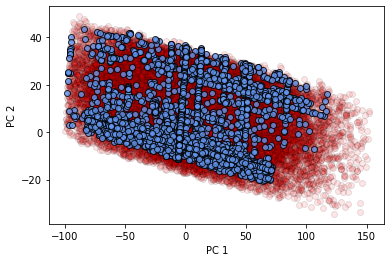

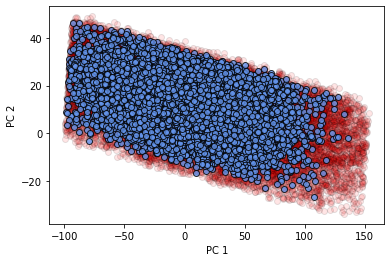

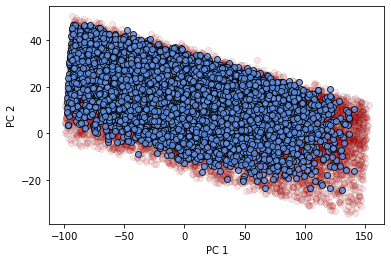

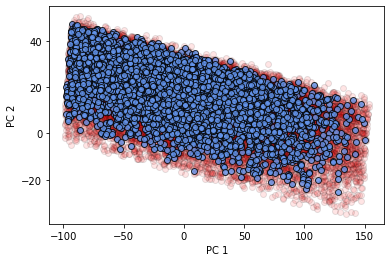

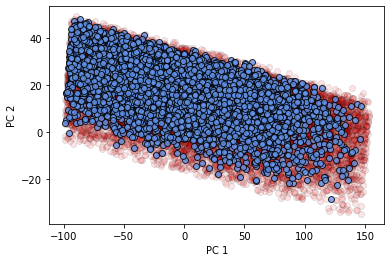

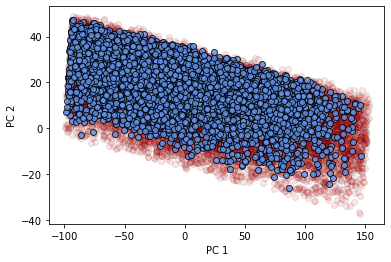

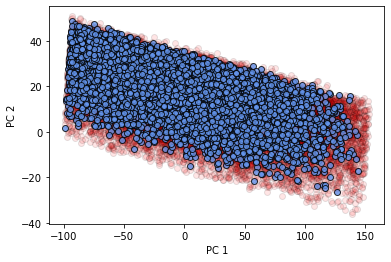

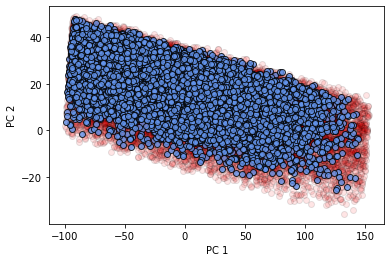

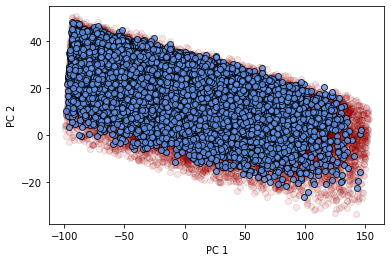

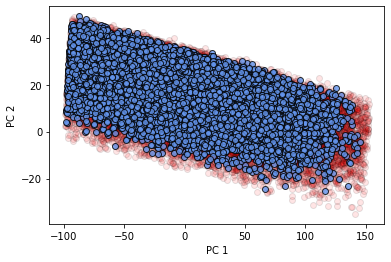

In [26]:
filename =  os.path.join(".", "repressilatorCostTwo")  
print(filename)   
model = Repressilator(parameter_values, np.array(["transcription", "transcription", "hill", "translation", "rna_degradation", "protein_degradation", "Kd"]), np.array([0, 0, 10, 150, 0, 0]), mode=1) 
solver = Solver(model)         
solver.run(filename) 

# Everything below is test/junk

In [101]:
sig = params[0]
p = params[1]
kdxn = params[2]
kexport = params[3]
kdxc = params[4]
eps = params[5]
kdyn = params[6]
Km = params[7]
kimport = params[8]

xn,xc,yc,yn = symbols('xn,xc,yc,yn')

eq1 = kdxn*(sig/(1 + yn**p) - xn) - kexport*xn 
eq2 = eps*kexport*xn - kdxc*xc
eq3 = kdyc*(xc - yc) - eps*kimport*yc 
eq4 = (kimport*yc) - (kdyn*yn/(Km + yn))

system = [eq1,eq2,eq3,eq4]
init_conc = [initial_populations[0],initial_populations[1],initial_populations[2],initial_populations[3]]
init_sol = np.random.rand(len(init_conc))*max(init_conc)

solution = nsolve(system, [xn,xc,yc,yn], init_sol, verify=True, dict=True)

solution

[{xn: 153.393690839455,
  xc: 153.393690839455,
  yc: 76.6968454197277,
  yn: 2.32192722307914}]

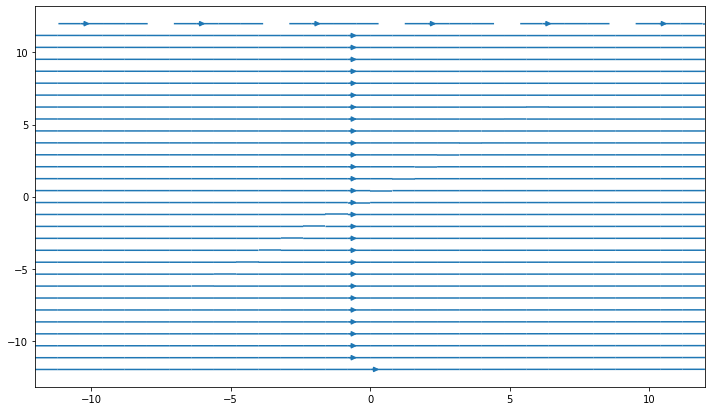

In [143]:
# ANOTHER Phase Diagram
# Creating data set
w = 12
Xc, Xn= np.mgrid[-w:w:100j, -w:w:100j]
#U = -1 - X**2 + Y
U = kdxn*(sig/(1 + 1**p) - Xn) - kexport*Xn 
#V = 1 + X - Y**2
V = eps*kexport*Xn - kdxc*Xc

#W = kdyc*(Xc - Yc) - eps*kimport*Yc

#X = (kimport*Yc) - (kdyn*Yn/(Km + Yn))
speed = np.sqrt(Xn**2 + Xc**2)
  
# Creating plot
fig = plt.figure(figsize = (12, 7))
plt.streamplot(Xn, Xc, U, V, density = 1)
  
# show plot
plt.show()

In [133]:
U

array([[122.4 + 10000/(yn**2 + 1), 119.927272727273 + 10000/(yn**2 + 1),
        117.454545454545 + 10000/(yn**2 + 1), ...,
        -117.454545454545 + 10000/(yn**2 + 1),
        -119.927272727273 + 10000/(yn**2 + 1),
        -122.4 + 10000/(yn**2 + 1)],
       [122.4 + 10000/(yn**2 + 1), 119.927272727273 + 10000/(yn**2 + 1),
        117.454545454545 + 10000/(yn**2 + 1), ...,
        -117.454545454545 + 10000/(yn**2 + 1),
        -119.927272727273 + 10000/(yn**2 + 1),
        -122.4 + 10000/(yn**2 + 1)],
       [122.4 + 10000/(yn**2 + 1), 119.927272727273 + 10000/(yn**2 + 1),
        117.454545454545 + 10000/(yn**2 + 1), ...,
        -117.454545454545 + 10000/(yn**2 + 1),
        -119.927272727273 + 10000/(yn**2 + 1),
        -122.4 + 10000/(yn**2 + 1)],
       ...,
       [122.4 + 10000/(yn**2 + 1), 119.927272727273 + 10000/(yn**2 + 1),
        117.454545454545 + 10000/(yn**2 + 1), ...,
        -117.454545454545 + 10000/(yn**2 + 1),
        -119.927272727273 + 10000/(yn**2 + 1),
     

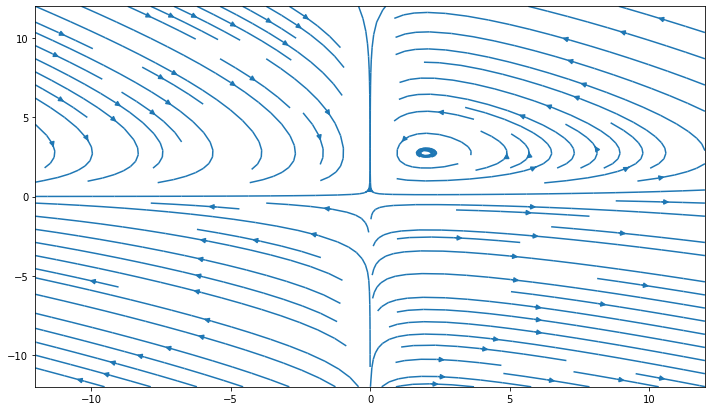

In [122]:
w = 12
Y, X = np.mgrid[-w:w:100j, -w:w:100j]
#U = -1 - X**2 + Y
U = (prey_growth_rate * X) - (prey_death_rate * X * Y)
#V = 1 + X - Y**2
V = (predator_growth_rate * X * Y) - (predator_death_rate * Y)
speed = np.sqrt(U**2 + V**2)
  
# Creating plot
fig = plt.figure(figsize = (12, 7))
plt.streamplot(X, Y, U, V, density = 1)
  
# show plot
plt.show()

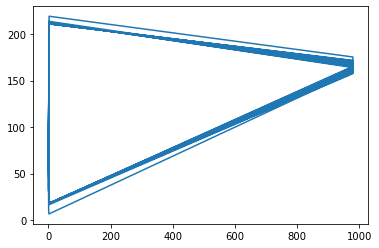

In [251]:
nullcline_xn = []
nullcline_xc = []
nullcline_yc = []
nullcline_yn = []

#def find_nullcline(solutions = solutions, equations = equations):
for i in solutions:
    xn = i[0]
    xc = i[1]
    yc = i[2]
    yn = i[3]

    eq1 = kdxn*(sig/(1 + yn**p) - xn) - kexport*xn 
    eq2 = eps*kexport*xn - kdxc*xc
    eq3 = kdyc*(xc - yc) - eps*kimport*yc 
    eq4 = (kimport*yc) - (kdyn*yn/(Km + yn))

    equations = [eq1,eq2,eq3,eq4]
    if isclose(equations[0], 0.0, abs_tol= 1):
        nullcline_xn.append(i)
    if isclose(equations[1], 0.0, abs_tol= 1):
        nullcline_xc.append(i)
    if isclose(equations[2], 0.0, abs_tol= 1):
        nullcline_yc.append(i)
    if isclose(equations[3], 0.0, abs_tol= 1):
        nullcline_yn.append(i)

#### plotting dictionaries for each nullcline, containing lists of each species
null_xn_dict = {}

null_xn_dict[xn] = [item[0] for item in nullcline_xn]
null_xn_dict[xc] = [item[1] for item in nullcline_xn]
null_xn_dict[yc] = [item[2] for item in nullcline_xn]
null_xn_dict[yn] = [item[3] for item in nullcline_xn]

null_xc_dict = {}

null_xc_dict[xn] = [item[0] for item in nullcline_xc]
null_xc_dict[xc] = [item[1] for item in nullcline_xc]
null_xc_dict[yc] = [item[2] for item in nullcline_xc]
null_xc_dict[yn] = [item[3] for item in nullcline_xc]

null_yc_dict = {}

null_yc_dict[xn] = [item[0] for item in nullcline_yc]
null_yc_dict[xc] = [item[1] for item in nullcline_yc]
null_yc_dict[yc] = [item[2] for item in nullcline_yc]
null_yc_dict[yn] = [item[3] for item in nullcline_yc]

null_yn_dict = {}

null_yn_dict[xn] = [item[0] for item in nullcline_yn]
null_yn_dict[xc] = [item[1] for item in nullcline_yn]
null_yn_dict[yc] = [item[2] for item in nullcline_yn]
null_yn_dict[yn] = [item[3] for item in nullcline_yn]

plt.plot(null_xn_dict[xn], null_xn_dict[xc])



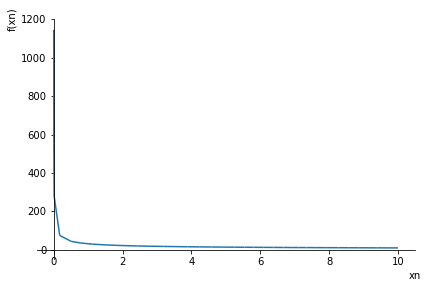

In [15]:
xn,xc,yc,yn = symbols('xn,xc,yc,yn')

eq1 = kdxn*(sig/(1 + yn**p) - xn) - kexport*xn 

y = solve(eq1, yn)[1]
plot(y, (xn, -10, 10))

In [245]:
o = [item[0] for item in nullcline_xn]
o

[0.0,
 0.1562807939542653,
 0.24952034846918228,
 0.30493373286652264,
 0.3376610822973963,
 0.35679294668621325,
 0.3677873220386399,
 0.3739210179166555,
 0.3771611292864323,
 0.3786883474902538,
 0.3792111772407214,
 0.3791546058318084,
 0.3787734093289591,
 0.3782201730682121,
 0.3775861399915427,
 0.37692573866923257,
 0.37627130993595903,
 0.37564194638256954,
 0.3750488083905645,
 0.37449830475530965,
 0.3739940060855371,
 0.37353779913036345,
 0.373130563910286,
 0.37277260382812677,
 0.37246388038500844,
 0.37220416463957295,
 0.3719931314801333,
 0.3718304031579153,
 0.37171558737219884,
 0.3716482935435896,
 0.3716281443977702,
 0.371654781647152,
 0.37172787003821733,
 0.3718470988875099,
 0.37201218310490325,
 0.3722228634203427,
 0.3724789062015207,
 0.3727801035173191,
 0.37312627198251425,
 0.37351725439916994,
 0.3739529181432245,
 0.3744331546317068,
 0.37495787941179765,
 0.37552703190375725,
 0.3761405750282818,
 0.3767984947396074,
 0.377500800328248,
 0.3782475240

In [ ]:
eq1 = kdxn*(sig/(1 + 0**p) - xn) - kexport*xn 

solve(eq1, xn)

In [ ]:
for i in range(r):
        for y in range(r):
            if ((f(x,y) == 0) and (g(x,y) == 0)):
                fp.append((x,y))
                print('The system has a fixed point in %s,%s' % (x,y))
    return fp

In [193]:

for i in solutions:
    print(i)

[  0.  40. 100.  50.]
[ 0.15628079 39.60279909 99.2029154  50.09881229]
[ 0.24952035 39.21076519 98.41179956 50.19365215]
[ 0.30493373 38.82335585 97.62661735 50.28454943]
[ 0.33766108 38.44023046 96.8473318  50.37153375]
[ 0.35679295 38.06116978 96.07390498 50.45463459]
[ 0.36778732 37.68602756 95.30629843 50.53388121]
[ 0.37392102 37.31470155 94.54447344 50.60930267]
[ 0.37716113 36.94711603 93.78839127 50.68092786]
[ 0.37868835 36.58321137 93.03801324 50.74878545]
[ 0.37921118 36.22293773 92.29330078 50.81290394]
[ 0.37915461 35.86625128 91.55421545 50.87331162]
[ 0.37877341 35.51311192 90.82071901 50.93003659]
[ 0.37822017 35.16348196 90.09277339 50.98310677]
[ 0.37758614 34.81732526 89.37034073 51.03254986]
[ 0.37692574 34.47460675 88.65338337 51.07839341]
[ 0.37627131 34.13529211 87.94186383 51.12066475]
[ 0.37564195 33.79934766 87.23574486 51.15939103]
[ 0.37504881 33.46674014 86.53498941 51.19459924]
[ 0.3744983  33.13743677 85.83956061 51.22631614]
[ 0.37399401 32.81140509 85.

In [185]:
t = np.array([1,2,3])
t = np.vstack([t,[4,5,6]])

t[1]

array([4, 5, 6])

In [188]:
u = np.array(0)
u.shape

()

In [180]:
solutions[1]

array([ 0.15628079, 39.60279909, 99.2029154 , 50.09881229])

In [222]:
xn = 153.393690839455
xc = 153.393690839455
yc = 76.6968454197277
yn = 2.32192722307914

print(equations[3])

isclose(equations[2], 0, abs_tol= .4)

-7.967160416860525


False